In [2]:
import sys
sys.path.append("../dev_scripts/")
import exp_tools
import sklearn
from sklearn.preprocessing import StandardScaler
import numpy as np
from fri import bounds,plot_dendrogram_and_intervals
from fri import *
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [3]:
n = 1000

In [4]:
X,y = exp_tools.gen_quadrant_pair(n=n)
X = StandardScaler().fit_transform(X)

In [82]:
X2,y2 = genClassificationData(n_samples=n,n_features=6,n_strel=1,n_redundant=2)
X2 = StandardScaler().fit_transform(X2)

Generating dataset with d=6,n=1000,strongly=1,weakly=2, partition of weakly=None


In [83]:
from collections import Counter

In [84]:
y_and = np.where(y == y2,1,-1)

In [85]:
X_and = np.hstack([X,X2])
#X_and = StandardScaler().fit_transform(X_and)

In [94]:
f = FRIClassification(debug=True,optimum_deviation=0.1,C=0.01)

In [95]:
f.fit(X_and,y_and)

loss 676.762234915
L1 1.10451972356
offset -0.019251207133060264
C 0.01
score 0.732023584377
coef:
[[  6.42877224e-14]
 [  1.56025092e-13]
 [  1.76114231e-01]
 [ -4.13997316e-01]
 [  4.13997293e-01]
 [ -7.36762658e-14]
 [ -2.52586654e-14]
 [  9.22775161e-14]]


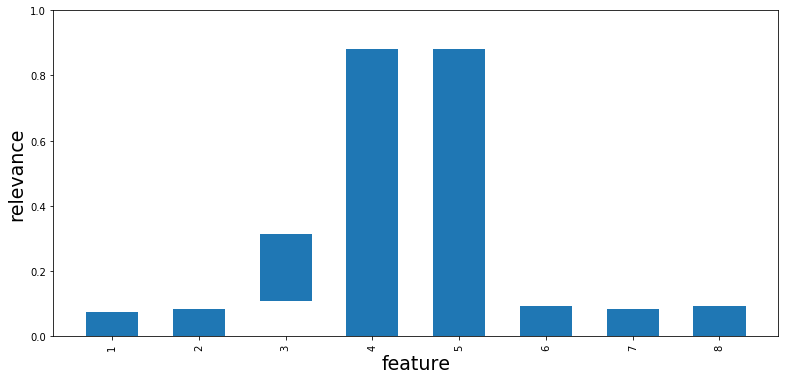

In [96]:
p = plotIntervals(f.interval_)

In [97]:
clust, link, feat_points,dist_mat = f.community_detection2(X_and,y_and)


Community detection: Constrained run failed, relaxing L1
Community detection: Constrained run failed, relaxing L1
Community detection: Constrained run failed, relaxing L1


In [105]:
import scipy
dist_mat = scipy.spatial.distance.squareform(dist_mat)

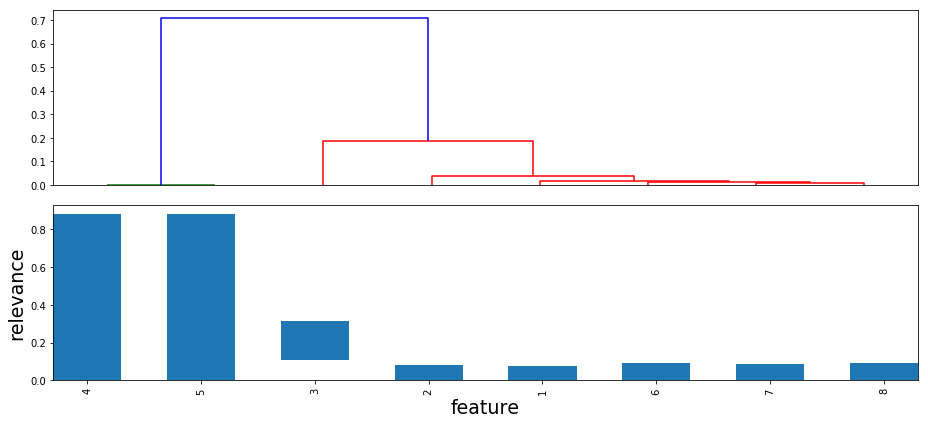

In [98]:
p = plot_dendrogram_and_intervals(f.interval_,link)

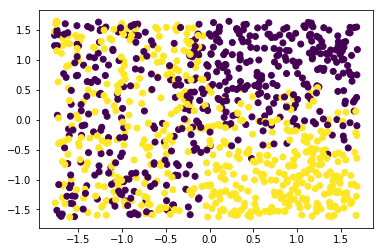

In [93]:
plt.scatter(X_and[:,0],X_and[:,3],c=y_and)

In [92]:
import pandas as pd
pd.DataFrame(X_and).corr()

,0,1,2,3,4,5,6,7
0,1.000000,0.018221,-0.003332,-0.044196,0.044196,-0.022336,0.024163,-0.006477
1,0.018221,1.000000,0.010558,0.023834,-0.023834,-0.028567,-0.004281,0.039127
2,-0.003332,0.010558,1.000000,-0.059860,0.059860,0.035157,0.038499,0.009335
3,-0.044196,0.023834,-0.059860,1.000000,-1.000000,0.004614,-0.056449,-0.001915
4,0.044196,-0.023834,0.059860,-1.000000,1.000000,-0.004614,0.056449,0.001915
5,-0.022336,-0.028567,0.035157,0.004614,-0.004614,1.000000,0.006672,0.003270
6,0.024163,-0.004281,0.038499,-0.056449,0.056449,0.006672,1.000000,-0.015202
7,-0.006477,0.039127,0.009335,-0.001915,0.001915,0.003270,-0.015202,1.000000


In [100]:
import seaborn as sns

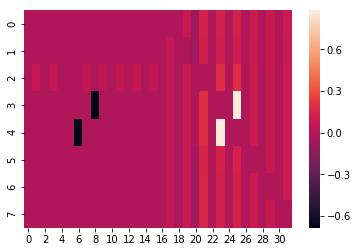

In [102]:
sns.heatmap(feat_points)